### Part 3
---

#### 0. Data Preparation
---

In [48]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import os
import pandas as pd

path = "./sentiment labelled sentences"
dir_name = os.listdir(path)
data = []

for file_name in dir_name:
    if file_name not in [".DS_Store", "readme.txt"]:
        with open(path + "/" + file_name, 'r', encoding="utf-8") as f:
            for line in f:
                tmp=[]
                sentence = line.split("\t")[0]               
                score = int(line.split("\t")[1].split("\n")[0])
                if file_name == "amazon_cells_labelled.txt":
                    source = "amazon"
                else:
                    source = file_name.rstrip("_labelled.txt")
                tmp.append(sentence)
                tmp.append(score)
                tmp.append(source)
                data.append(tmp)

X = pd.DataFrame(data, columns = ["sentence", "score", "source"])
X

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp
2996,Appetite instantly gone.,0,yelp
2997,Overall I was not impressed and would not go b...,0,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp


#### 1. Generate meaningful new data visualizations
---

#### 2. Generate TF-IDF features

---

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=False, stop_words=None, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True, norm='l2')
tfidf = vectorizer.fit_transform(X.sentence)
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf

,0,00,1,10,100,11,12,13,15,15g,...,yukon,yum,yummy,yun,z,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3. Implement a simple Naive Bayes classifier

---

##### 3.1 word frequency features

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

train_data, test_data = train_test_split(X, random_state=777, train_size=0.8)

model = make_pipeline(CountVectorizer(), MultinomialNB())

model.fit(train_data.sentence, train_data.score)
labels = model.predict(test_data.sentence)

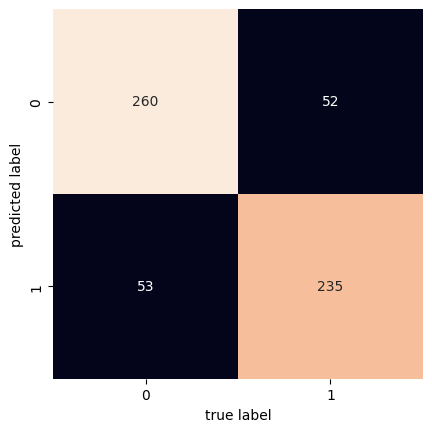

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

mat = confusion_matrix(test_data.score, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

##### 3.2 TF-IDF features

In [53]:
train_data, test_data = train_test_split(X, random_state=777, train_size=0.8)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train_data.sentence, train_data.score)
labels = model.predict(test_data.sentence)

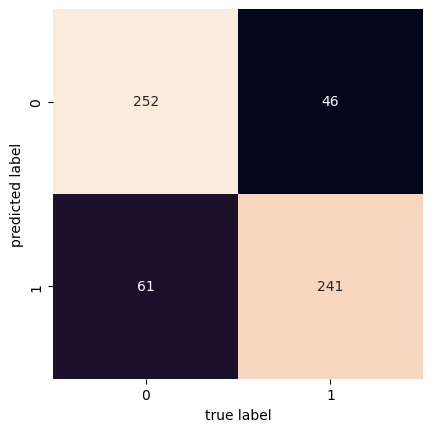

In [54]:
mat = confusion_matrix(test_data.score, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');